In [1]:
from pklshop.data import *
from pklshop.stats import *
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
rally = get_tab_as_df("rally")
players = get_tab_as_df("player")
game = get_tab_as_df("game")
team = get_tab_as_df("team")
match = get_tab_as_df("match")
tournament = get_tab_as_df("tournament") 
shots = get_tab_as_df("shot")
shot_type_ref = get_tab_as_df("shot_type_ref")

In [2]:
fs_win_frac = [team_first_serve_win_frac(team_id) for team_id in team.team_id]
team['fs_win_frac'] = fs_win_frac

In [3]:
team.sort_values('fs_win_frac', ascending=False)

,team_id,player_id,player_seq_nbr,team_nm,maint_dtm,maint_app,create_dtm,create_app,fs_win_frac
76,T39,P61,1,Gizmo Hall & David McNally,2022-10-20 22:42:52.072401+00:00,postgres,2022-10-20 22:42:52.072401+00:00,postgres,1.0
19,T10,P18,2,Greg Dow & Anderson Scarpa,2022-07-28 21:21:24.377249+00:00,postgres,2022-07-28 21:21:24.377249+00:00,postgres,1.0
21,T11,P20,2,Chrissy Penfold & Eli Powell,2022-08-03 02:10:17.304370+00:00,postgres,2022-08-03 02:10:17.304370+00:00,postgres,1.0
79,T40,P63,2,Ryan Kane & Brandon Ward,2022-10-20 22:42:52.079848+00:00,postgres,2022-10-20 22:42:52.079848+00:00,postgres,1.0
24,T13,P23,1,Collin Johns & Ben Johns,2022-08-08 03:10:56.810337+00:00,postgres,2022-08-08 03:10:56.810337+00:00,postgres,1.0
...,...,...,...,...,...,...,...,...,...
46,T24,P33,1,David McNally & Harsh Pareek,2022-09-09 17:20:52.862381+00:00,postgres,2022-09-09 17:20:52.862381+00:00,postgres,0.0
47,T24,P36,2,David McNally & Harsh Pareek,2022-09-09 17:20:52.877344+00:00,postgres,2022-09-09 17:20:52.877344+00:00,postgres,0.0
48,T25,P37,1,Paul Olin & Dave Fleming,2022-09-11 19:28:43.005760+00:00,postgres,2022-09-11 19:28:43.005760+00:00,postgres,0.0
49,T25,P38,2,Paul Olin & Dave Fleming,2022-09-11 19:28:43.011348+00:00,postgres,2022-09-11 19:28:43.011348+00:00,postgres,0.0


In [6]:
pro_games = game[game.skill_lvl == "Pro"]
amateur_games = game[game.skill_lvl != "Pro"]

first_serve_win_frac_overall = get_frac_first_serve_wins(game)
first_serve_win_frac_pro = get_frac_first_serve_wins(pro_games)
first_serve_win_frac_amateur = get_frac_first_serve_wins(amateur_games)

In [7]:
print("The first serve win percentage overall is {:.2f}% for {} games.".format(first_serve_win_frac_overall*100, len(game)))
print("The first serve win percentage for Pros is {:.2f}% for {} games.".format(first_serve_win_frac_pro*100, len(pro_games)))
print("The first serve win percentage for Amateurs is {:.2f}% for {} games.".format(first_serve_win_frac_amateur*100, len(amateur_games)))

The first serve win percentage overall is 54.90% for 51 games.
The first serve win percentage for Pros is 47.22% for 36 games.
The first serve win percentage for Amateurs is 73.33% for 15 games.


In [8]:
colors = sns.color_palette('pastel')

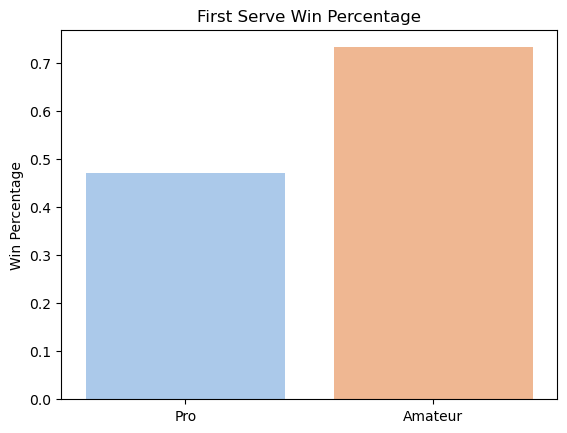

In [9]:
sns.barplot(x=[ 'Pro', 'Amateur'], y=[first_serve_win_frac_pro, first_serve_win_frac_amateur], palette=colors)
plt.title("First Serve Win Percentage")
plt.ylabel("Win Percentage")
# plt.savefig('figures/first_serve_win_percentage.pdf')
plt.show()
